# Exploring new features

In the previous notebook, we explored the target variable and the features that were already available. In this notebook, we will focus on the new features correlated with text data.

In [1]:
# import basic libraries
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path  # for path related operations

pd.options.display.max_colwidth = 100  # to display full text in columns

In [2]:
# load data
data_path = Path("../../Data")
train_df = pd.read_csv(data_path / "train.csv")

In [3]:
# Name of the columns
text_col = "full_text"
numberic_cols = [
    "cohesion",
    "syntax",
    "vocabulary",
    "phraseology",
    "grammar",
    "conventions",
]
num_of_words = "num_of_words"

### Create numeber of words feature

In [5]:
# Add a column to store the number of words in the text
train_df[num_of_words] = train_df[text_col].apply(lambda x: len(x.split()))

<AxesSubplot: title={'center': 'Distribution of text length'}, ylabel='Frequency'>

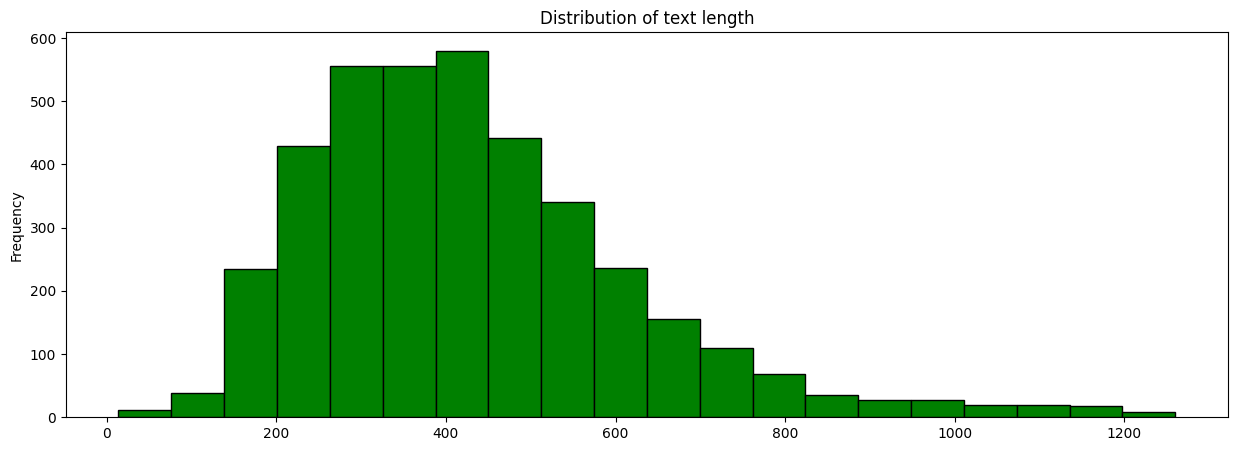

In [13]:
# Plot the distribution of text length
train_df[num_of_words].plot(
    kind="hist",
    figsize=(15, 5),
    bins=20,
    title="Distribution of text length",
    color="green",
    edgecolor="black",
    xlabel="Number of words",
    ylabel="Frequency",
)

<AxesSubplot: title={'center': 'num_of_words'}, xlabel='[cohesion, syntax, vocabulary, phraseology, grammar, conventions]'>

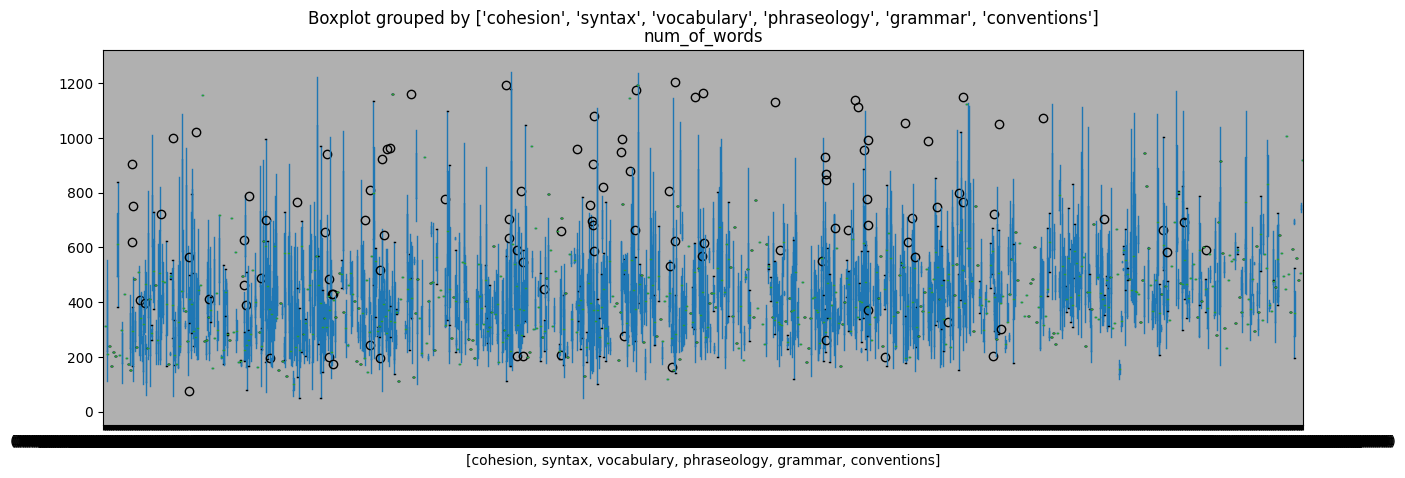

In [24]:
# Plotbox of the length of each text for each numeric feature
train_df.boxplot(column=num_of_words, by=numberic_cols, figsize=(15, 5))

### Do this for all numerical features separately

In [35]:
def plot_feature_vs_num_of_words(name_of_feature, train_df):
    """
    Plot the number of words in the text for each cohesion value
    """
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.boxplot(x=name_of_feature, y=num_of_words, data=train_df, palette="Set3")
    ax.set_title("Number of words in the text for each cohesion value")
    ax.set_xlabel(name_of_feature)
    ax.set_ylabel("Number of words")
    plt.show()

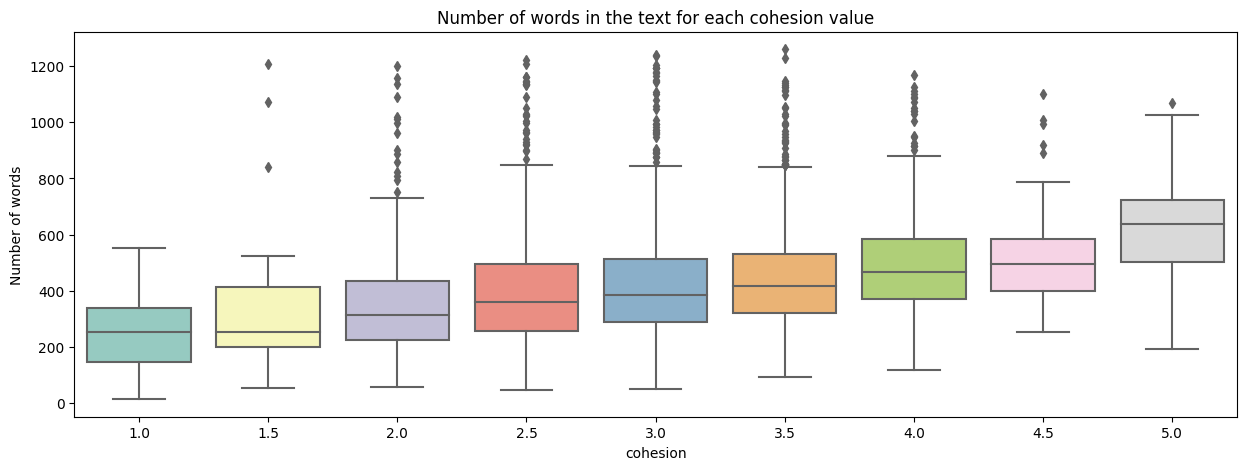

In [36]:
plot_feature_vs_num_of_words("cohesion", train_df)

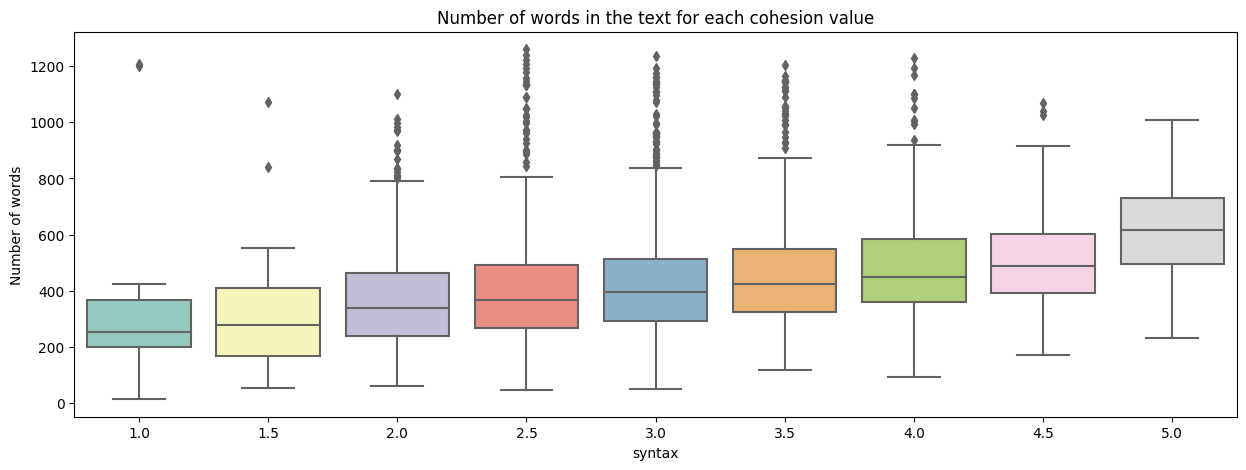

In [37]:
plot_feature_vs_num_of_words("syntax", train_df)

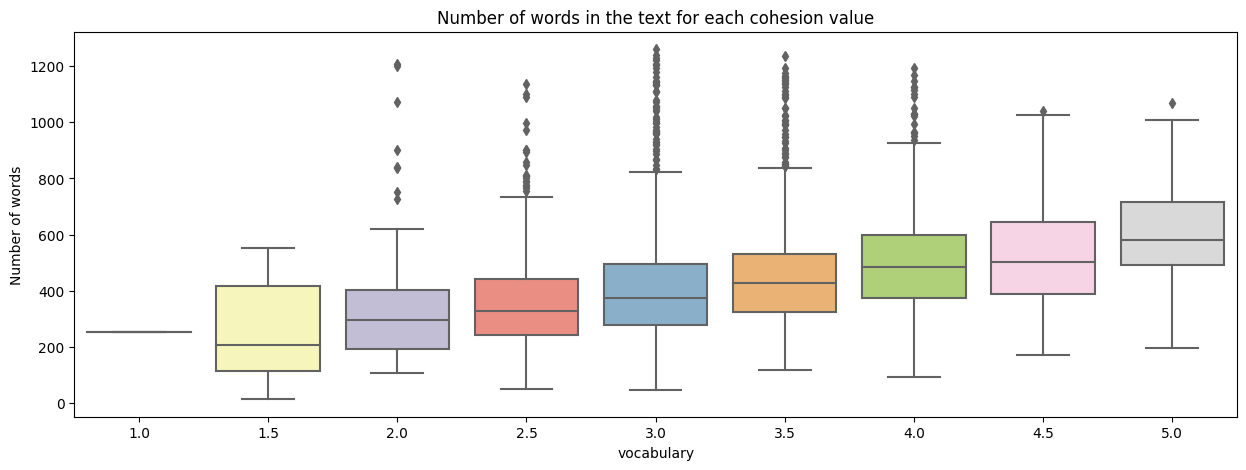

In [38]:
plot_feature_vs_num_of_words("vocabulary", train_df)

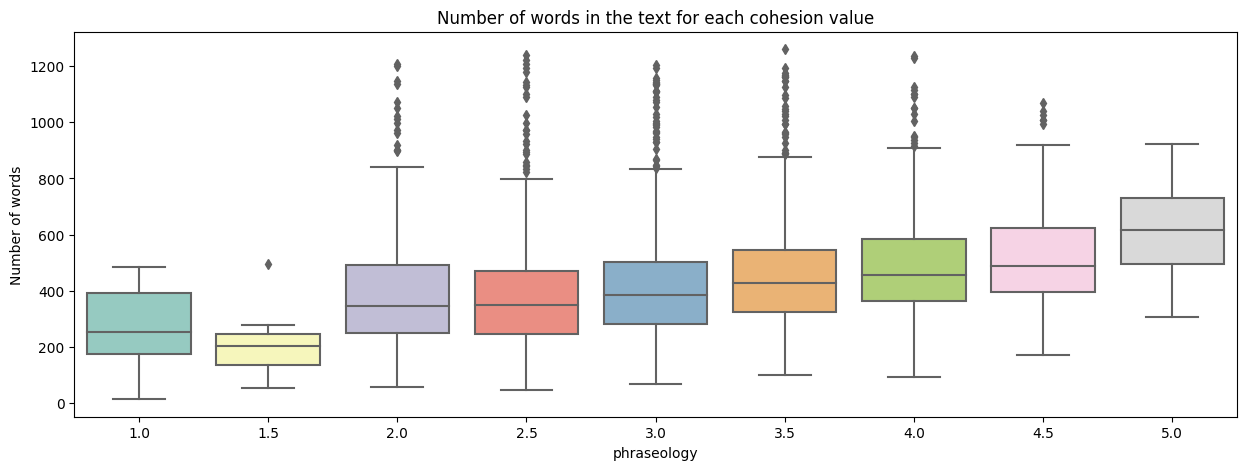

In [39]:
plot_feature_vs_num_of_words("phraseology", train_df)

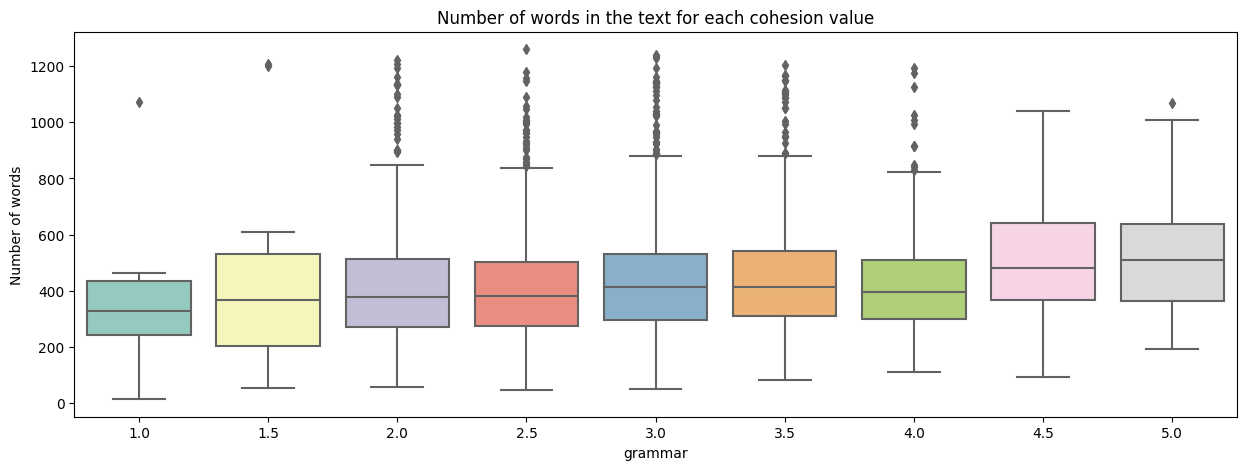

In [40]:
plot_feature_vs_num_of_words("grammar", train_df)

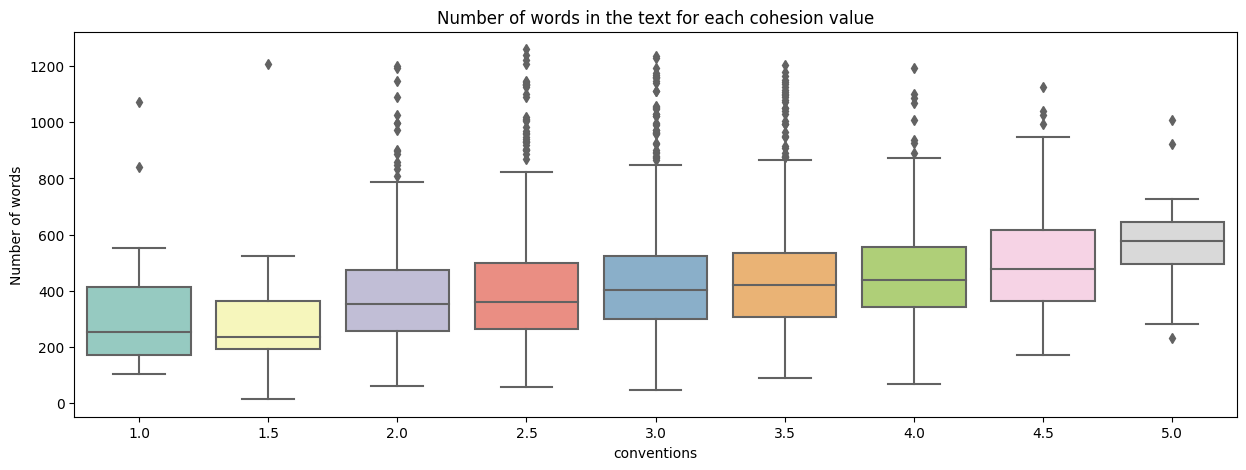

In [41]:
plot_feature_vs_num_of_words("conventions", train_df)

<AxesSubplot: >

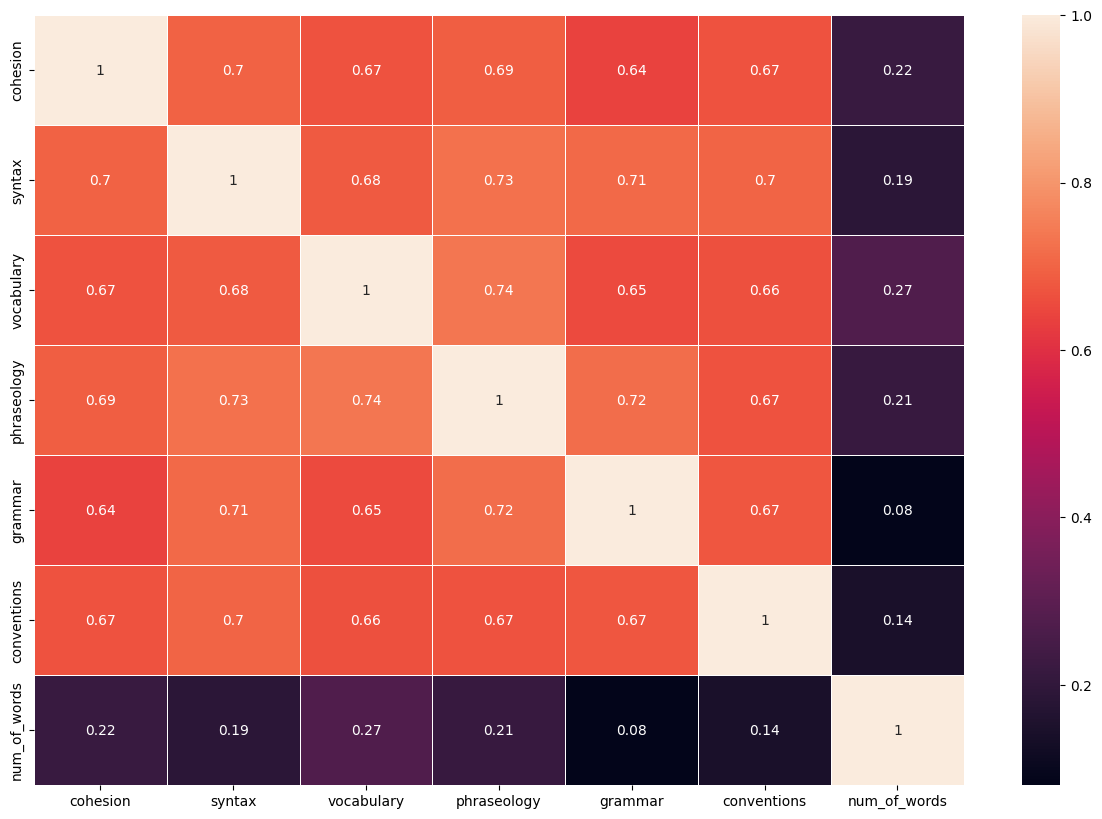

In [48]:
# Plot correlation matrix
corr = train_df[numberic_cols + [num_of_words]].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linewidths=0.5,
    ax=ax,
)

### Create feater with percent of punctuation marks

In [13]:
percent_of_punctation = "percent_of_punctation"
puncation_pattern = r"[^\w\s]"

In [15]:
# Create a new column to store the percentage of punctuation marks in the text
train_df[percent_of_punctation] = train_df[text_col].apply(
    lambda x: len(re.findall(puncation_pattern, x)) / len(x.split())
)

In [16]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,num_of_words,percent_of_punctation
0,0016926B079C,"I think that students would benefit from learning at home,because they wont have to change and g...",3.5,3.5,3.0,3.0,4.0,3.0,261,0.080460
1,0022683E9EA5,When a problem is a change you have to let it do the best on you no matter what is happening it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,0.039400
2,00299B378633,"Dear, Principal\n\nIf u change the school policy of having a grade b average that unfair. Becaus...",3.0,3.5,3.0,3.0,3.0,2.5,320,0.112500
3,003885A45F42,"The best time in life is when you become yourself. I agree that the greatest accomplishment, is ...",4.5,4.5,4.5,4.5,4.0,5.0,728,0.148352
4,0049B1DF5CCC,Small act of kindness can impact in other people can change people to become better persons you ...,2.5,3.0,3.0,3.0,2.5,2.5,234,0.012821


<AxesSubplot: title={'center': 'Distribution of the percentage of punctuation marks in the text'}, ylabel='Frequency'>

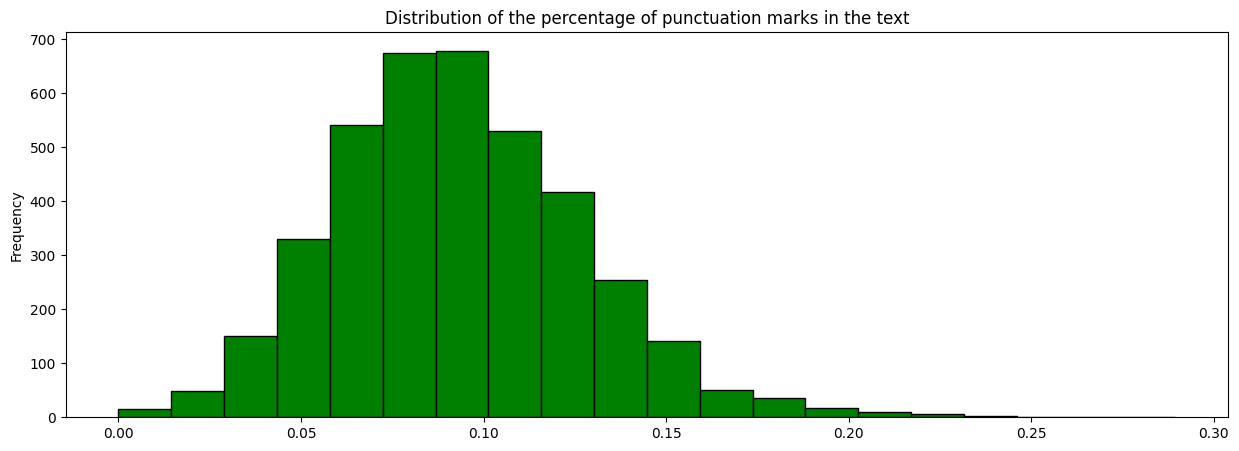

In [20]:
# Plot the distribution of the percentage of punctuation marks in the text
train_df[percent_of_punctation].plot(
    kind="hist",
    figsize=(15, 5),
    bins=20,
    title="Distribution of the percentage of punctuation marks in the text",
    color="green",
    edgecolor="black",
    xlabel="Percentage of punctuation marks",
    ylabel="Frequency",
)

<AxesSubplot: title={'center': 'percent_of_punctation'}, xlabel='[cohesion, syntax, vocabulary, phraseology, grammar, conventions]'>

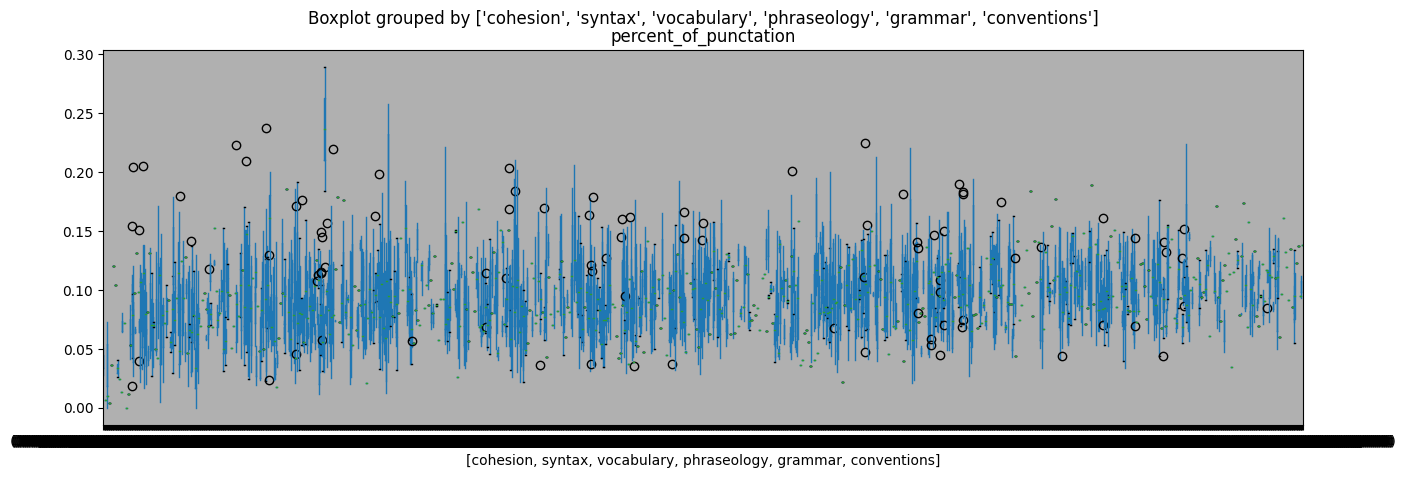

In [21]:
# Plotbox of the percentage of punctuation marks in the text for each numeric feature
train_df.boxplot(column=percent_of_punctation, by=numberic_cols, figsize=(15, 5))

<AxesSubplot: >

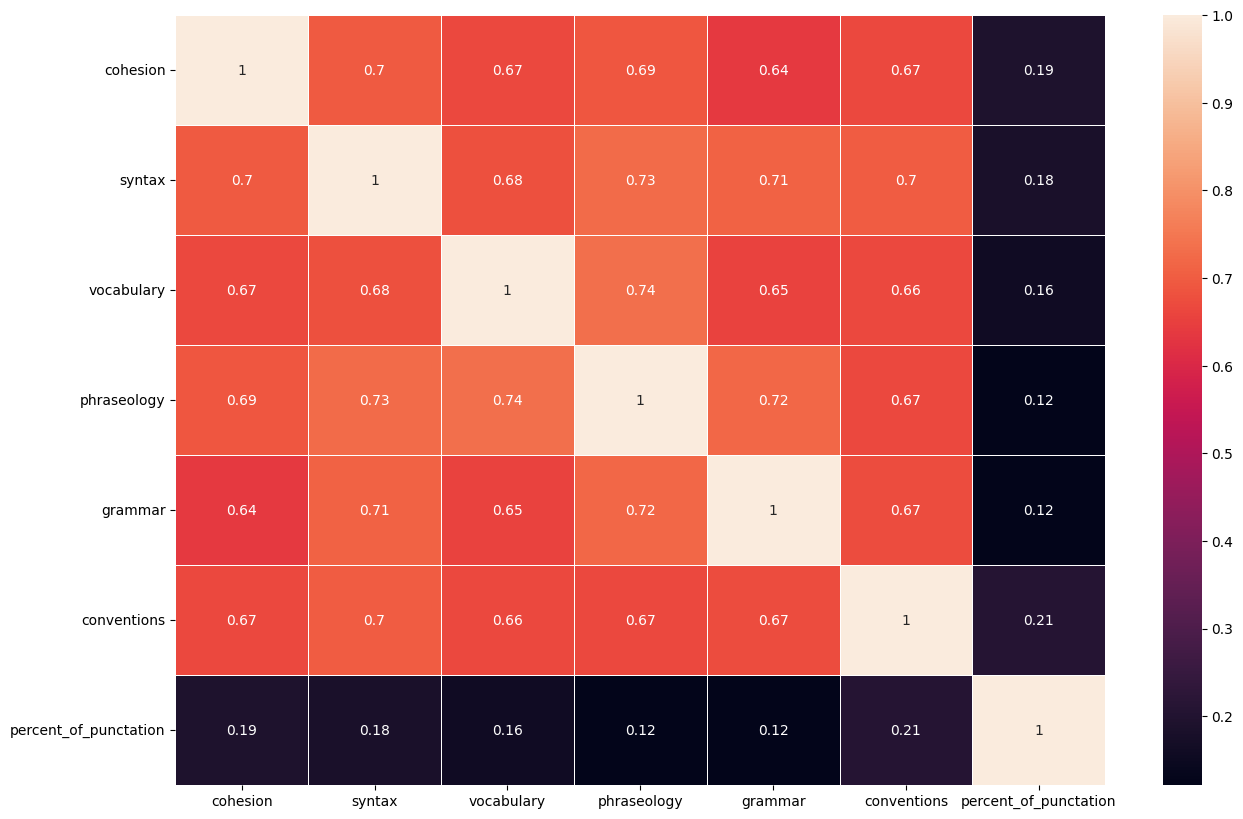

In [22]:
# Correlation matrix
corr = train_df[numberic_cols + [percent_of_punctation]].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linewidths=0.5,
    ax=ax,
)

### Create feature with percent of misspelled words

In [6]:
from spellchecker import SpellChecker

In [7]:
# Create a new column with the number of misspelled words in the text
num_of_misspelled_words = "num_of_misspelled_words"

In [30]:
puncation_pattern = r'[.,"!?_]'


def get_num_of_misspelled_words(text):
    spell = SpellChecker()
    text = re.sub(puncation_pattern, " ", text)
    misspelled = spell.unknown(text.split())
    return len(misspelled)

In [31]:
spell = SpellChecker()
train_df[num_of_misspelled_words] = train_df[text_col].apply(
    lambda x: get_num_of_misspelled_words(x)
)

In [32]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,num_of_words,num_of_misspelled_words
0,0016926B079C,"I think that students would benefit from learning at home,because they wont have to change and g...",3.5,3.5,3.0,3.0,4.0,3.0,261,0
1,0022683E9EA5,When a problem is a change you have to let it do the best on you no matter what is happening it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,0
2,00299B378633,"Dear, Principal\n\nIf u change the school policy of having a grade b average that unfair. Becaus...",3.0,3.5,3.0,3.0,3.0,2.5,320,3
3,003885A45F42,"The best time in life is when you become yourself. I agree that the greatest accomplishment, is ...",4.5,4.5,4.5,4.5,4.0,5.0,728,1
4,0049B1DF5CCC,Small act of kindness can impact in other people can change people to become better persons you ...,2.5,3.0,3.0,3.0,2.5,2.5,234,7


<AxesSubplot: title={'center': 'Distribution of the number of misspelled words in the text'}, ylabel='Frequency'>

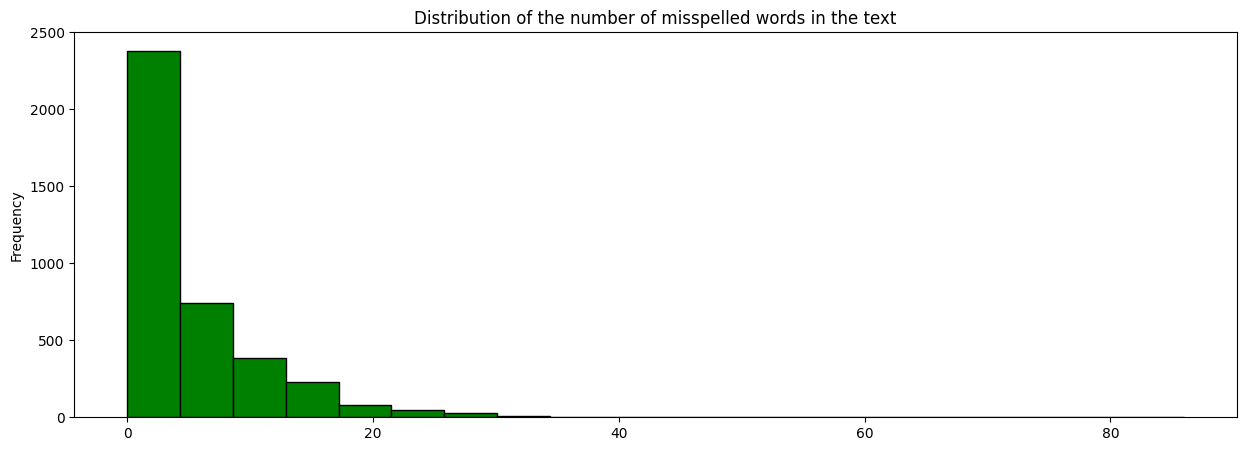

In [36]:
# Plot the distribution of the number of misspelled words in the text
train_df[num_of_misspelled_words].plot(
    kind="hist",
    figsize=(15, 5),
    bins=20,
    title="Distribution of the number of misspelled words in the text",
    color="green",
    edgecolor="black",
    xlabel="Number of misspelled words",
    ylabel="Frequency",
)

<AxesSubplot: title={'center': 'num_of_misspelled_words'}, xlabel='[cohesion, syntax, vocabulary, phraseology, grammar, conventions]'>

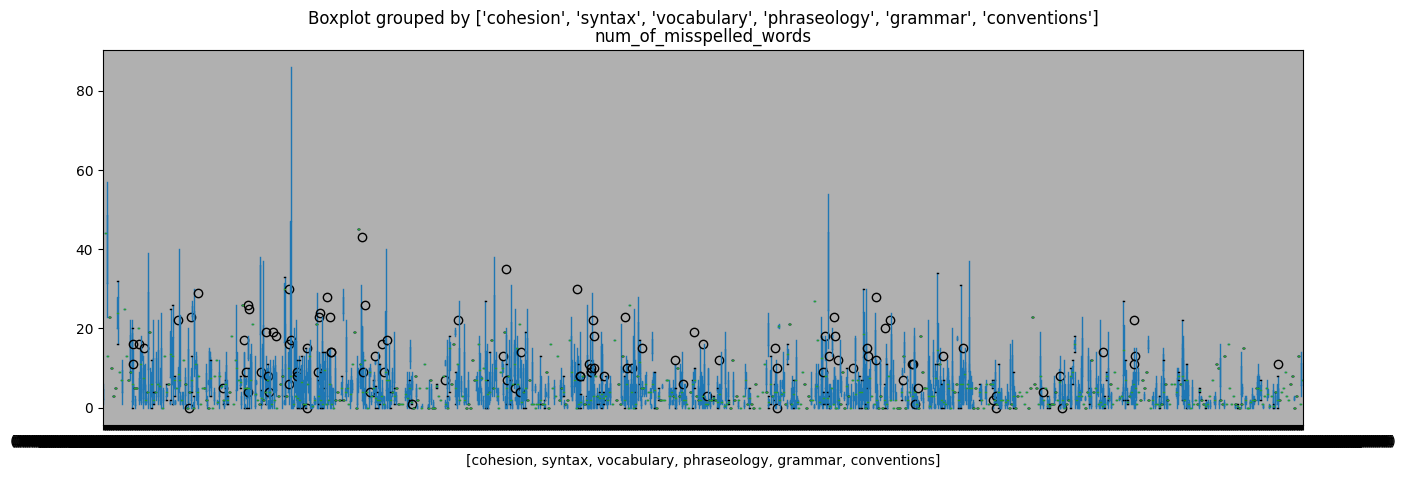

In [37]:
# Plotbox of the number of misspelled words in the text for each numeric feature
train_df.boxplot(column=num_of_misspelled_words, by=numberic_cols, figsize=(15, 5))

<AxesSubplot: >

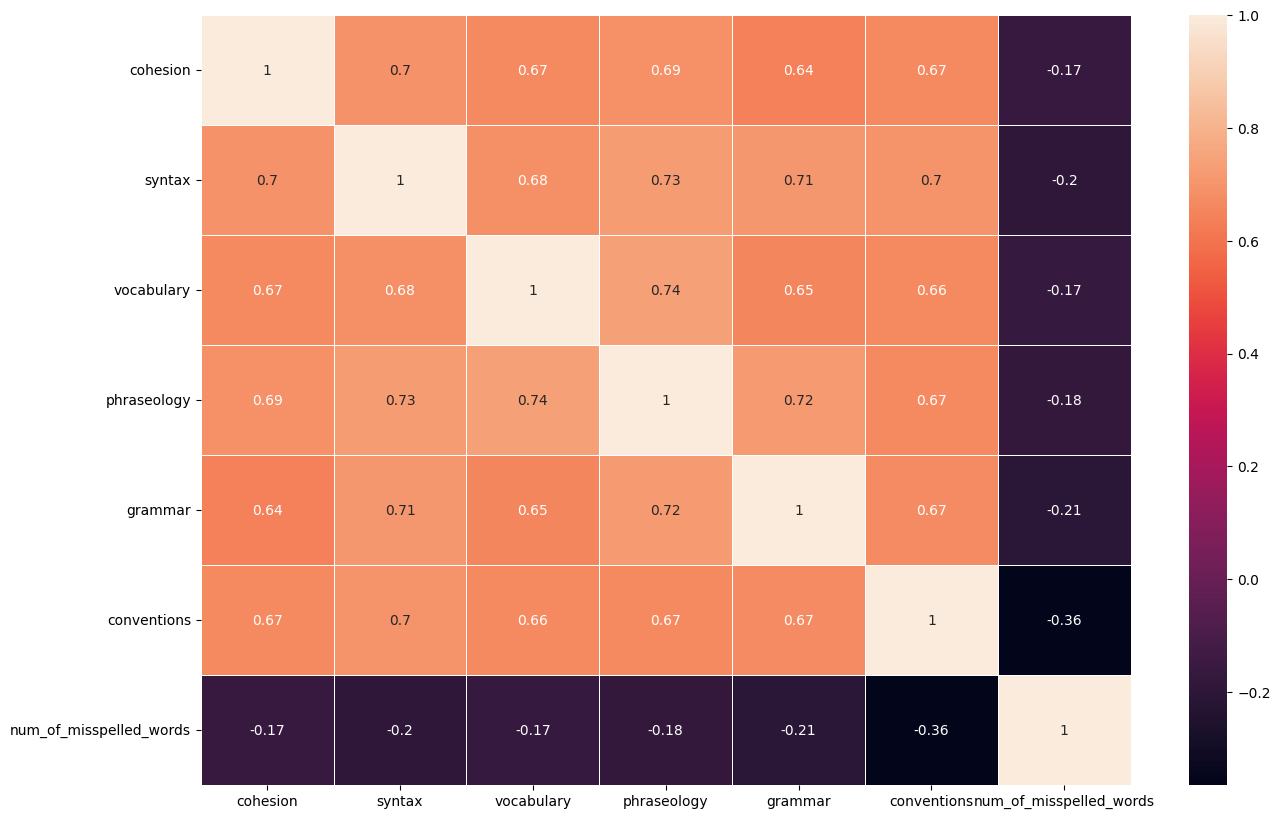

In [38]:
# Correlation matrix
corr = train_df[numberic_cols + [num_of_misspelled_words]].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linewidths=0.5,
    ax=ax,
)

### Create feature with percent of words in uppercase

In [5]:
# Create a new column with percentage of uppercase letters in the text
percent_of_uppercase = "percent_of_uppercase"

In [6]:
train_df[percent_of_uppercase] = train_df[text_col].apply(
    lambda x: len([c for c in x if c.isupper()]) / len(x.split())
)

In [7]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,percent_of_uppercase
0,0016926B079C,"I think that students would benefit from learning at home,because they wont have to change and g...",3.5,3.5,3.0,3.0,4.0,3.0,0.011494
1,0022683E9EA5,When a problem is a change you have to let it do the best on you no matter what is happening it ...,2.5,2.5,3.0,2.0,2.0,2.5,0.022514
2,00299B378633,"Dear, Principal\n\nIf u change the school policy of having a grade b average that unfair. Becaus...",3.0,3.5,3.0,3.0,3.0,2.5,0.093750
3,003885A45F42,"The best time in life is when you become yourself. I agree that the greatest accomplishment, is ...",4.5,4.5,4.5,4.5,4.0,5.0,0.083791
4,0049B1DF5CCC,Small act of kindness can impact in other people can change people to become better persons you ...,2.5,3.0,3.0,3.0,2.5,2.5,0.012821
